# wikipedia_documents 자체 EDA

* 문서 개수 60612개, 동일한 context별로 묶으면 31755개
* 문서 길이
* 문서 형태
    * 제목이 있는가?
    * 표 등이 포함되어있는가?

In [93]:
import json
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
json_path = '../input/data/wikipedia_documents.json'
with open(json_path) as wiki_file:
    wiki_dict = json.load(wiki_file)

---
## title 별 context 개수
- title은 카테고리가 아니라 문서 제목을 의미합니다. 
- 총 text 개수는 60613개이지만, 동일한 title의 text를 분할하여 하나의 text로 칩니다.
    - **즉, text 하나마다 다른 주제가 아닙니다.**

In [3]:
columns = ['text','title','document_id']
df = pd.DataFrame.from_dict(wiki_dict, orient='index')[columns]
df

,text,title,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",나라 목록,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,나라 목록,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,백남준,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",아오조라 문고,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,아오조라 문고,4
...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",오키나와 현립 박물관·미술관,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",오키나와 현립 박물관·미술관,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,오키나와 현립 박물관·미술관,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,단결권 및 단체교섭권 협약,60611


---
* title별로 나누었을때 문서는 31755개가 있습니다.

In [4]:
df.title.value_counts()

장면            146
윤치호           144
여운형            96
데카메론의 줄거리      68
루트비히 판 베토벤     66
             ... 
TT-33           1
액막이             1
손열음             1
잡가 (제자백가)       1
카라멜 (밴드)        1
Name: title, Length: 31755, dtype: int64

In [5]:
df.groupby('title').text.count().sort_values()

title
스코틀랜드 의회             1
서병조                  1
서버 에뮬레이터             1
지브롤터의 코로나19 범유행      1
서배스천 코               1
                  ... 
루트비히 판 베토벤          66
데카메론의 줄거리           68
여운형                 96
윤치호                144
장면                 146
Name: text, Length: 31755, dtype: int64

---
* **31755개중 3만개 가량이 5개 이하의 짧은 문서임을 확인할 수 있습니다.**
- **따라서, top-k는 5~10가량에서부터 제대로된 성능을 보일것입니다.**

In [6]:
text_counts = pd.cut(df.groupby('title').text.count().sort_values(), bins=[0,1,3,5,10,30,60,200])
text_counts.value_counts()

(0, 1]       20018
(1, 3]        8738
(3, 5]        1691
(5, 10]        950
(10, 30]       317
(30, 60]        34
(60, 200]        7
Name: text, dtype: int64

---
* 최다 text를 가진 title은 '장면' 문서인데, 총 146개의 context가 있고, context도 outlier가 없이 비교적 일정하네요.

In [7]:
df.loc[df['title']=='장면']

,text,title,document_id
2360,그는 지난날 일제 강점기의 교육자·종교가·번역가·출판인·문인·저술가였으며 훗날 대한...,장면,2360
2361,"장면은 1899년 8월 28일 서울 종로구 적선동, 삼군부(三軍部) 건물 뒷골목 근...",장면,2361
2362,"처음 이름은 돌림자를 따서 지태(志兑)라 지었다가 후에 열심히 공부하라, 면학하라는...",장면,2362
2363,이후 아버지의 근무지인 인천부 전동(典洞)으로 와서 살다가 1908년 인천부 인천항...,장면,2363
2364,"1917년 3월, 장면은 농림학교를 졸업하였다 그러나 ‘금테 모자를 쓰고, 칼을 차...",장면,2364
...,...,...,...
6982,고려대학교 한국사학과 교수 조광은 한 대담에서 '각종 한국사 개설서를 들춰보았는데 ...,장면,6982
6983,"장면은 직접 가톨릭 교회의 교리관련 서적을 한글로 번역하여 발표, 출간하기도 했다....",장면,6983
6984,"그는 춤도 출 줄 몰랐고, 술을 마실 줄도 몰랐으며, 노래라고는 성가와 팝송 몇 곡...",장면,6984
6985,그는 술과 담배를 하지 않았다 한다. 맨해튼 대학 재학 시절 위궤양과 위장 질환으로...,장면,6985


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='text'>

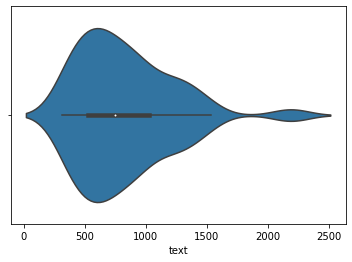

In [8]:
sns.violinplot(df.loc[df['title']=='장면']['text'].str.len())

---
## title, text의 길이

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='title', ylabel='count'>

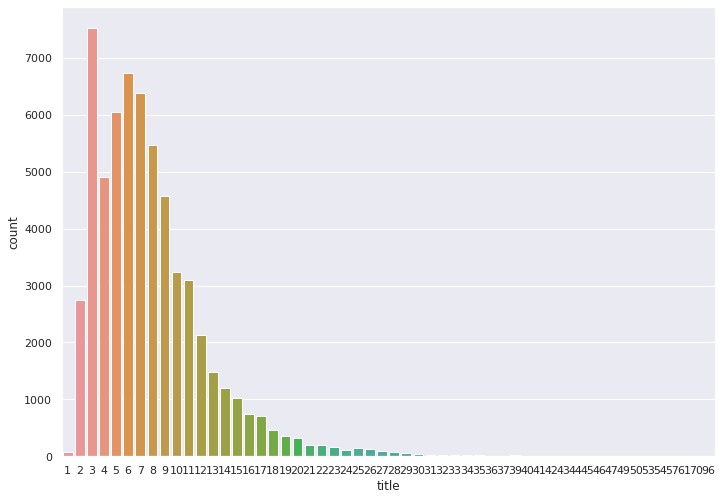

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df.title.str.len())

In [10]:
df.title.str.len().sort_values()

9018      1
10592     1
12497     1
9002      1
19451     1
         ..
15192    70
36463    96
36462    96
36465    96
36464    96
Name: title, Length: 60613, dtype: int64

---
- title이 가장 긴 문서는 36465번째 문서인데, 96자나 됩니다.
- 제목에 「」 와 같은 특수문자도 들어가네요.

In [11]:
print(df.iloc[36465].title)
print(df.iloc[15192].title)

플라타너스 나무가 서 있는 길에서 「네 미소가 꿈에 나왔어」라고 말해버린다면 우리들의 관계는 어떻게 변하는 걸까, 나 나름대로 며칠이고 생각해본 후의 조금 부끄러운 결론처럼
Computers and Intractability: A Guide to the Theory of NP-Completeness


---
- text가 가장 긴 문서는 '소학언해'로 9102번인데, 46099자나 됩니다. 9101번과 연결된 text인듯 한데, 둘다 4만자가 넘네요.
    - 두 문서는 어떤 기준으로 쪼개졌을까요?
- text 내용을 살펴보면, 한자와 깨진 문자가 굉장히 많이 나오네요. 이런 문서가 과연 활용될까요?
    - 사람도 알아보기 힘든 옛날 언어로 쓰여있는데, 과연 이런 문서에서 질문을 묻는 쿼리가 있을까요? vocab을 만드는데 굉장히 해가될 것 같은 문서입니다...

In [12]:
df['text_length'] = df.text.str.len()
df.sort_values('text_length', ascending=False)

,text,title,document_id,text_length
9102,"어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...",소학언해,9102,46099
4548,"어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...",소학언해,4548,46099
9101,"아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...",소학언해,9101,41411
4547,"아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...",소학언해,4547,41411
9756,1907년 이후 하와이에 건너가 살던 조선인 노동자들은 하와이 농장에서 사탕수수와 ...,사진 신부,9756,29016
...,...,...,...,...
29269,알백은 설치 시 윈도 기본 복원 시스템은 기본적으로 비활성화된다.\n\n멀티 부팅 ...,알백,29269,301
12478,"일반적으로 산스크리트어와 팔리어 음가는 일대일로 대응하는 것으로 보는데, 팔리어가 ...",팔리어,12478,301
46268,그는 웨스트민스터 신학교(M. Div)와 케임브리지 대학교(Ph. D)의 니콜라스 ...,케빈 밴후저,46268,301
40352,1989년 8월 30일 미국 뉴욕 브루클린에서 태어났다. 부모님은 알바니아 출신으로...,비비 렉사,40352,301


In [13]:
print(df.iloc[9102].text[:1000])

어딘 실이니 례예 여재라

○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正獻公居家, 簡 重寡黙, 不以事物經心, 而申國夫人, 性嚴有法度, 雖甚愛公, 然, 敎公, 事事循蹈規矩.

呂榮公의 일홈 希哲이오 字 原明이니 申國 正獻公 [일홈  公著ㅣ니 申은 봉 히오 正獻은 시회니 宋 적 졍승이 라] 의 아이라 正獻公이 집의 이실 제 간략며 후듕며 잡일 아니며 잡말 아니야 일과 온갓 거스로 애 경 영티 아니고 申國夫人이 性이 嚴고 法度ㅣ 이셔 비록 심 히 公을 랑나 그러나 公을 츄  規矩 조차 드듸게 더라

甫十歲, 祁寒暑雨, 侍立終日, 不命之坐, 不敢坐也. 日必冠帶, 以見長者, 平居雖甚熱, 在父母長者之側, 不得去巾襪縳袴, 衣 服唯謹.

계오 열 설에 큰 치위와 덥고 비올 제라두 뫼셔 셧기를 날이 도록 야 命야 안라 아니커든 敢히 안 아니더라 날마다 반시 冠帶야  얼우신 뵈오며 샹해 이실 제 비록 심히 더우나 父母와 얼우신 겯틔 이셔 시러곰 곳갈와 보 션과 뎐 밧디 아니야 衣服을 오직 삼가더라

行步出入, 無得入茶肆酒肆, 市井里巷之語, 鄭衛之音, 未嘗一 經於耳, 不正之書, 非禮之色, 未嘗一接於目.

녀 거러 나며 들음애 시러곰 차  집과 술  집의 드 디 아니며 져제와  말와 鄭과 衛ㅅ 소 [두 나라 일 홈이니 음탕 풍라] 를 일즉 번 귀예 디내디 아니며 正티 아니 글월와 禮 아닌 빗 일즉 번 눈에 브티디 아 니더라

正獻公通判潁州, 歐陽公適知州事. 焦先生千之伯强, 客文忠公 所, 嚴毅方正, 正獻公招延之, 使敎諸子. 諸生小有過差, 先生 端坐, 召與相對, 終日竟夕, 不與之語, 諸生恐懼畏伏, 先生方 略降辭色.

正獻公이 穎州 [고을 일홈이라]ㅣ예 通判 [판관 톄엿 벼슬이 라] 여실 제 歐陽公 [일홈은 修ㅣ니 宋 적 샹이라] 이 州 事를 지엿더니 [아단 말이니 목 톄엿 벼슬이라] 焦 先生 千之 伯强 [千之 일홈이오 伯强은 라] 이 文忠公 [歐陽公 시회라] 

* 문서의 평균 길이는 약 600자 전후입니다. 75% 가량 문서가 400자~800자 전후입니다.

In [14]:
df.text.str.len().describe()

count    60613.000000
mean       755.565044
std        762.962671
min        184.000000
25%        414.000000
50%        577.000000
75%        857.000000
max      46099.000000
Name: text, dtype: float64

---
# Retrieve EDA

## MRC Dataset

In [15]:
import json
import argparse
from collections import defaultdict

from datasets import load_from_disk, load_dataset, load_metric

from tools import *
from retrieval.sparse import TfidfRetrieval, BM25Retrieval



In [16]:
SEEDS = [95, 12, 0, 7, 63, 3, 2, 61, 4, 32, 40, 94, 2033, 2314]

arg_parser = argparse.ArgumentParser(description="mrc-stage-openqa-vumblebot")

arg_parser.add_argument("--strategies", type=str2list)
arg_parser.add_argument("--run_cnt", type=int, default=1)
arg_parser.add_argument("--seeds", type=str2intlist, default=SEEDS)
arg_parser.add_argument("--data_path", type=str, default="../input/")
arg_parser.add_argument("--debug", type=str2bool, default=False)

# use for predict
arg_parser.add_argument("--model_path", type=str, default="")

# data_path + 'info', 시각화를 위한 정보 저장
# data_path + 'checkpoint', 모델 가중치 저장
# data_path + 'config', 모델 하이퍼파라미터
# data_path + 'embed', 임베딩 데이터
# data_path + 'train_data', MRC 데이터

args = arg_parser.parse_args("--strategies koel_TFIDF".split())
args.path = argparse.Namespace()
args.path.info = p.join(args.data_path, "info")
args.path.embed = p.join(args.data_path, "embed")
args.path.config = p.join(args.data_path, "config")
args.path.checkpoint = p.join(args.data_path, "checkpoint")

for k in ["info", "embed", "config", "checkpoint"]:
    path = getattr(args.path, k)
    if not p.exists(path):
        os.mkdir(path)

args.path.train_data_dir = p.join(args.data_path, "data")

if not os.path.exists(args.path.train_data_dir):
    raise FileNotFoundError(
        f"{p.abspath(args.path.train_data_dir)} \
            위치가 보이지 않습니다. args.path값을 절대 경로로 수정하거나 \
            input과 같은 폴더에 위치해주세요."
    )

if args.run_cnt > len(SEEDS):
    raise ValueError("SEEDS를 직접 입력하거나 SEEDS Default 값을 늘려주세요. ")

parser = HfArgumentParser((ModelArguments, DataTrainingArguments, TrainArguments, RetrievalTrainingArguments))
model_args, data_args, train_args, retriever_args = parser.parse_args_into_dataclasses(args=[])
training_args = TrainingArguments(output_dir=args.path.checkpoint)

args.model = model_args
args.data = data_args
args.train = training_args
args.retriever = retriever_args

update_args(args, args.strategies[0])

Namespace(alias='base', data=DataTrainingArguments(dataset_name='train_dataset', overwrite_cache=False, preprocessing_num_workers=4, max_seq_length=384, pad_to_max_length=False, batch_size=32, doc_stride=128, max_answer_length=30, train_retrieval=True, eval_retrieval=True), data_path='../input/', debug=False, model=ModelArguments(model_name_or_path='monologg/koelectra-small-v3-discriminator', retriever_name='TFIDF', reader_name='DPR', config_name='', tokenizer_name=''), model_path='', path=Namespace(checkpoint='../input/checkpoint', config='../input/config', embed='../input/embed', info='../input/info', train_data_dir='../input/data'), retriever=RetrievalTrainingArguments(dense_train_dataset='train_dataset', topk=10, retrain=False, b=0.01, k1=0.1), run_cnt=1, seeds=[95, 12, 0, 7, 63, 3, 2, 61, 4, 32, 40, 94, 2033, 2314], strategies=['koel_TFIDF'], train=TrainingArguments(output_dir=../input/checkpoint, overwrite_output_dir=True, do_train=True, do_eval=False, do_predict=False, evaluatio

In [17]:
data_dir = '../input/data'
dummy_dir = '/'.join([data_dir,'dummy_dataset'])
train_dir = '/'.join([data_dir,'train_dataset'])
test_dir = '/'.join([data_dir,'test_dataset'])

dummy_train_path = '/'.join([dummy_dir, 'train'])
dummy_val_path = '/'.join([dummy_dir, 'validation'])

datasets = load_from_disk(dummy_dir)
datasets

DatasetDict({
    train: Dataset({
        features: ['answers', 'context', 'id', 'question', 'title'],
        num_rows: 200
    })
    validation: Dataset({
        features: ['answers', 'context', 'id', 'question', 'title'],
        num_rows: 20
    })
})

---
* TFIDF 기준입니다.

In [18]:
retriever = TfidfRetrieval(args)
retriever.get_embedding()

In [19]:
word_count = pd.DataFrame({
    'token': retriever.encoder.get_feature_names(),
    'sum_tfidf': retriever.p_embedding.sum(axis=0).flat
})

- 20개 * top-10 => 200 row의 데이터셋

In [20]:
val_datasets = retriever.retrieve(datasets['validation'], topk=args.retriever.topk)

In [21]:
topk_dataset = val_datasets['validation']
topk = pd.DataFrame(topk_dataset)
print(len(topk))
topk.head(10)

200


,answers,context,id,original_context,question
0,"{'answer_start': [63], 'text': ['루피']}",R. J. 셰퍼는 목격자의 증언을 검증하는 점검 목록을 제공한다. \n\n# 저술이...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
1,"{'answer_start': [63], 'text': ['루피']}",MSX/패미컴판은 스토리가 단순히 무술대회에서 우승하는것을 넘어 중국을 어지럽히는 ...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
2,"{'answer_start': [63], 'text': ['루피']}","제1격인 선제핵공격을 한 북한이 ICBM을 보유한 경우에는, 상대방 국가들은 핵우산...",mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
3,"{'answer_start': [63], 'text': ['루피']}",마리아나 해전에서 승리를 거둔 미군은 일본이 본토 방어를 위해 설정한 절대국방권을 ...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
4,"{'answer_start': [63], 'text': ['루피']}",창수는 540년에 독립된 현이 되었으나 581년에 쑤저우에 속하게 되었다. 1295...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
5,"{'answer_start': [63], 'text': ['루피']}",상어는 로렌치니기관(Ampullae of Lorenzini)이라는 전기를 감지하는 ...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
6,"{'answer_start': [63], 'text': ['루피']}","1951년 7월 개성에서 휴전 회담이 열렸으나, 결국 합의에 실패하였다. 그리고 8...",mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
7,"{'answer_start': [63], 'text': ['루피']}",암호학에서 부채널 공격(side channel attack)은 알고리즘의 약점을 찾...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
8,"{'answer_start': [63], 'text': ['루피']}",부채널 공격은 보통 다음과 같이 나뉜다.\n\n* 소요 시간 분석(Timing at...,mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
9,"{'answer_start': [63], 'text': ['루피']}","연합군 해군의 일본 포격은 제2차 세계 대전의 마지막 주 동안 미국 해군, 영국 해...",mrc-0-005140,C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 ...,공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?


---
- validation에 존재하는 20개의 질문 중 10개의 질문에 대한 top-10 context들을 한번 보겠습니다.
- TF/IDF 방식은 당연히 질문에 들어간 단어가 자주 있을수록 존재합니다. 
- **top-10 이내에 정답을 찾은 질문은 20개중 18개였습니다.**
    - 정답을 못찾은 질문 : 1, 5

In [22]:
total, correct = len(datasets['validation']),0
top_n = defaultdict(int)
for i in range(len(datasets['validation'])):
    print("INDEX:", i+1)
    for j in range(args.retriever.topk):
        if topk.original_context[i*10] == topk.context[i*10+j]:
            print(f'True - top-{j+1}')
            correct+=1
            top_n[j+1] += 1
            break
    print("question :", topk.question[i*10])
    print("answer :", topk.answers[i*10]['text'])
    print("original :", topk.original_context[i*10])
    print(topk.context[i*10:(i+1)*10])
    print('\n\n')

print(f"{correct}/{total}")

INDEX: 1
question : 공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
answer : ['루피']
original : C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 왕이 될 야욕을 가지고 있다. 루피와 우시가 시비를 걸었다고 생각하고 공격하여 우시를 쓰러뜨린다. 하지만 이에 분개한 루피의 무장색+기초전투력에 일격에 당하고 만다. 드레스로자 지하 고철처리장이란 함정에 빠져서 슈거의 하비하비 열매 능력에 의해 장난감이 되어버린 후, 슈거와 트레볼의 명령에 따라 움직이고 있었지만, 우솝이 슈거를 기절시키면서 원래모습으로 돌아온다. 톤톤 열매 능력자인 마하 바이스랑 전투에서 자신과 롤로노아 조로에게 '지옥의 만 톤 바이스'로 공격하려는 마하 바이스를 상처입은 몸으로 '궁니르(영웅의 창)'으로 날려버린다. 후지토라랑 싸우는 몽키 D. 루피를 데려가 올럼버스의 배 '욘타마리아 호'에 태운다. 이후, 드레스로자에서 활약한 모든 해적단들과 몽키 D. 루피가 이끄는 밀짚모자 해적단 산하 해적단에 들어가기로 마음을 먹지만, 모두 거절당한다. 하지만, 모든 해적단들과 같이 밀짚모자 해적단에 산하 해적단으로 들어가기로 마음을 먹고, 술잔을 나눈다. 이후에는 버기즈 딜리버리(BD)를 그만두고 신 거병 해적단을 만들게 된다.
0    R. J. 셰퍼는 목격자의 증언을 검증하는 점검 목록을 제공한다. \n\n# 저술이...
1    MSX/패미컴판은 스토리가 단순히 무술대회에서 우승하는것을 넘어 중국을 어지럽히는 ...
2    제1격인 선제핵공격을 한 북한이 ICBM을 보유한 경우에는, 상대방 국가들은 핵우산...
3    마리아나 해전에서 승리를 거둔 미군은 일본이 본토 방어를 위해 설정한 절대국방권을 ...
4    창수는 540년에 독립된 현이 되었으나 581년에 쑤저우에 속하게 되었다. 1295...
5    상어는 로렌치니기관(Ampullae of Lorenzini)이라는 전기를 감지하는 ...
6    1951년 7

---
- 정답을 찾지 못한 지문의 특징을 봅시다.
- '루피'가 답인데, original text에서 question과 겹치는 걸로 보이는 부분은 다음 부분입니다.
    > **루피**와 **우시**가 시비를 걸었다고 생각하고 **공격**하여 우시를 **쓰러뜨린다**. 하지만 이에 **분개한** 루피의 무장색+기초전투력에 **일격에 당하고 만다**.
- top-10으로 꼽힌 다른 text들을 보면, '루피'나 '우시'보다는 '공격'이라는 단어를 중심으로 탐색되었다는 것을 알 수 있습니다.
- 질문상에 '공격'이라는 단어가 두 번 사용되기도 했고, '화가 나' == '분개한', '공격'=='일격'이라는 것을 tf-idf는 포착하지 못했습니다.

In [23]:
i=0
print("question :", topk.question[i*10])
print("answer :", topk.answers[i*10]['text'])
print("original :", topk.original_context[i*10])
print(topk.context[i*10:(i+1)*10])

question : 공격을 받아 쓰러진 우시를 보고 화가 나 공격한 인물은?
answer : ['루피']
original : C블록에서 엄청난 활약을 한다. 이글이글 열매를 손에 넣어서 세계의 모든 거인들의 왕이 될 야욕을 가지고 있다. 루피와 우시가 시비를 걸었다고 생각하고 공격하여 우시를 쓰러뜨린다. 하지만 이에 분개한 루피의 무장색+기초전투력에 일격에 당하고 만다. 드레스로자 지하 고철처리장이란 함정에 빠져서 슈거의 하비하비 열매 능력에 의해 장난감이 되어버린 후, 슈거와 트레볼의 명령에 따라 움직이고 있었지만, 우솝이 슈거를 기절시키면서 원래모습으로 돌아온다. 톤톤 열매 능력자인 마하 바이스랑 전투에서 자신과 롤로노아 조로에게 '지옥의 만 톤 바이스'로 공격하려는 마하 바이스를 상처입은 몸으로 '궁니르(영웅의 창)'으로 날려버린다. 후지토라랑 싸우는 몽키 D. 루피를 데려가 올럼버스의 배 '욘타마리아 호'에 태운다. 이후, 드레스로자에서 활약한 모든 해적단들과 몽키 D. 루피가 이끄는 밀짚모자 해적단 산하 해적단에 들어가기로 마음을 먹지만, 모두 거절당한다. 하지만, 모든 해적단들과 같이 밀짚모자 해적단에 산하 해적단으로 들어가기로 마음을 먹고, 술잔을 나눈다. 이후에는 버기즈 딜리버리(BD)를 그만두고 신 거병 해적단을 만들게 된다.
0    R. J. 셰퍼는 목격자의 증언을 검증하는 점검 목록을 제공한다. \n\n# 저술이...
1    MSX/패미컴판은 스토리가 단순히 무술대회에서 우승하는것을 넘어 중국을 어지럽히는 ...
2    제1격인 선제핵공격을 한 북한이 ICBM을 보유한 경우에는, 상대방 국가들은 핵우산...
3    마리아나 해전에서 승리를 거둔 미군은 일본이 본토 방어를 위해 설정한 절대국방권을 ...
4    창수는 540년에 독립된 현이 되었으나 581년에 쑤저우에 속하게 되었다. 1295...
5    상어는 로렌치니기관(Ampullae of Lorenzini)이라는 전기를 감지하는 ...
6    1951년 7월 개성에서 휴전

- '동방 언어 학원'이 답인데, original text에서 question과 겹치는 걸로 보이는 부분은 다음 부분입니다.
    > **파리 대학교**에는 **교황**에 의해 **무슬림들의 개종과 동방 정교회와의 재일치**를 위해 그들의 언어를 **가르치려는** 목적으로 **동방 언어 학원**이 **설립**되었다.
    - "파리대학교", "교황" 등의 단어는 그대로 사용되었지만, "무슬림들의 개종과 동방 정교회와의 재일치"라는 부분은 "종교적 목적"으로 치환되었고, "가르치려는" 역시 "교육"으로 치환되었습니다.
    - 문맥을 파악하는 중요한 부분은 Dense embedding에 비해 확실히 떨어지게 됩니다.
- top-10으로 꼽힌 다른 text들을 보면, '파리대학교'와 '교황'이라는 단어에 집중했다는 것을 알 수 있습니다.
    - 또한, original text에서는 나오지 않았으나 question에는 나오는 '종교', '교육'등의 단어가 중요하게 사용되었습니다.

In [24]:
i=4
print("question :", topk.question[i*10])
print("answer :", topk.answers[i*10]['text'])
print("original :", topk.original_context[i*10])
print(topk.context[i*10:(i+1)*10])

question : 종교적 목적으로 파리 대학교에 교황이 세운 교육 기관은?
answer : ['동방 언어 학원']
original : 호노리오 4세는 십자군 원정을 계획했으나, 실제 활동은 피렌체와 시에나, 피스토이아의 은행인 가문들의 협조를 받아 제2차 리옹 공의회에서 시행한 십일조 징수에만 국한되었다.\n\n파리 대학교에는 교황에 의해 무슬림들의 개종과 동방 정교회와의 재일치를 위해 그들의 언어를 가르치려는 목적으로 동방 언어 학원이 설립되었다.\n\n그는 재임기간 동안 오직 한 명의 추기경만 서임했는데, 바로 1285년 12월 22일 서임된 몬레알레 대주교이자 그의 사촌인 조반니 보카마차이다.\n\n1285년 몽골의 지도자 아르군 칸이 호노리오 4세에게 사절과 함께 친서를 보냈다. 현재 그가 보낸 친서의 라틴어 번역본은 바티칸에 소장되어 있다. 친서에서 그는 무슬림들의 땅에 대해 함께 군사 공격을 하자고 제안했다.\n\n“우리와 당신 사이에 있는 무슬림들의 땅인 시리아와 이집트를 우리가 에워싸고 압박합시다. 우리는 귀하에게 이집트에 군대를 파병할 것을 요청하는 사절들을 보내면, 우리는 당신께 훌륭한 전사들을 보내겠습니다. 귀하가 이에 응하고자 한다면 우리 사절들을 통해 알려주시기 바랍니다. 우리는 주님과 교황과 위대한 칸의 도움으로 사라센족을 쫓아낼 것입니다.”|1285년 아르군 칸이 호노리오 4세에게 보낸 친서 내용 중에서, 바티칸 문서고 \n\n그러나 호노리오 4세에게는 칸이 제안한 계획을 달성하기 위해 필요한 군사적 지원을 할 만큼의 능력이 없었다.\n\n호노리오 4세의 무덤은 로마의 산타 마리아 인 아라챌리 성당에 있다.
40    파리 대학교(Université de Paris)는 중세 대학 가운데 가장 중요하고...
41    교황 요한 21세( Ioannes PP. XXI,  Papa Giovanni XXI...
42    교육성(敎育省, Congregatio de Institutione Catholica...
43    종교 교육(宗敎敎育

---
* 반대로 정답을 한번에 찾은 지문들을 살펴볼까요?
    - 2, 3, 6, 11, 12, 18, 20

- 대부분의 질문에서 보이는 특징은, 다른 지문에서는 잘 나오지 않을법한 명사형 단어가 '2개 이상' 등장한다는 것입니다.
    - ('핸콕', '추장'), ('티칼', '마야'), ('가트나', '사물 인터넷')....
    - 1개 정도의 명사형 단어만 등장하거나, 서술어가 paraphrase(망하게 -> 멸망시키다)된 경우 특히 추측확률이 낮아졌습니다.
- 대략적인

In [25]:
for i in [2, 3, 6, 11, 12, 18, 20]:
    i = i-1
    print("question :", topk.question[i*10])
    print("answer :", topk.answers[i*10]['text'])
    print("original :", topk.original_context[i*10])
    print(topk.context[i*10:(i+1)*10])
    print('\n\n')

question : 백인들이 핸콕 추장을 살해한 이유는?
answer : ['백인들은 추장을 ‘부족 지배자’라고 믿고 있기 때문에']
original : 1711년 가을, 핸콕 추장이 이끄는 남부 투스카로라 족은 팸플리코 족, 코세치니 족, 코어 족, 마타마스키토 족 및 마체펀고 족과 연합하여, 짧은 시간에 넓은 범위의 정착민을 습격했다. 목표가 된 것은 로어노크 강, 뉴스 강, 트렌트 강변 농장 및 바스 시였다. 첫 번째 공격은 1711년 9월 22일에 시작되어, 결국 수백 정착민이 죽었다. 정치적 중심이 되어 있던 인물도 죽거나 혹은 몇 달 동안 피해다녀야 했다.\n\n식민지 주지사였던 에드워드 하이드는 노스캐롤라이나 민병대를 소집하고, 사우스캐롤라이나 의회를 돕기로 결정했다. 사우스캐롤라이나 의회는 ‘존 반웰 대령이 지휘하는 600명의 민병과 360명의 인디언’을 보냈다. 이 부대는 1712년에 뉴스 강 양안의 나한츠 요새에서 남부 투스카로라 족과 크레이븐 카운티의 다른 부족을 공격했다. 투스카로라 족은 큰 손실을 입고 패배했다. 300명 이상의 인디언이 죽고 100여명은 포로가 되었다. 이 포로는 대부분 여자 또는 아이였고, 노예로 팔려갔다.\n\n블런트 추장은 “그가 개척민들을 도와 핸콕 추장의 무리를 진압하는 데 도움을 주면 투스카로라 족 전체를 통치할 기회를 준다”는 제안을 받았다. 블런트 추장은 남부 추장을 붙잡을 수 있었고, 이주민들은 1712년 핸콕 추장을 처형했다. 1713년, 남부 투스카로라 족은 그린 카운티에 있던 네오헤로카 요새를 함락당하고 900명이 죽거나 포로가 되었다.\n\n백인들은 블런트 추장에게 “투스카로라 족 전체를 지배할 기회를 주겠다”고 제안했지만, 추장은 그런 권한을 가진 존재가 아니다. 백인들은 추장을 ‘부족 지배자’라고 믿고 있기 때문에, 핸콕 추장을 죽여 버린 것이다. 중재자인 추장을 잃은 남부 투스카로라 족 대부분은 이제 노스캐롤라이나의 개척자에서 벗어나 현재의 뉴욕으로 북상하여 이주를 시작했다.
10    17

---
### 단어별 tf-idf 총합,평균
* '루피'같은 토큰은 53개밖에 등장하지 않았지만, 평균적으로 문서에서 차지하는 비중은 0.076349정도로 꽤 높습니다.
* '공격'같은 토큰은 3718개나 되는 문서에서 등장합니다. 평균적으로 차지하는 비중은 0.026151입니다.
    - 각 문서에서 토큰의 embedding 값이 '어느정도' 여야 해당 문서에서 주목할만한 토큰일까요?🤔
* **'활나라'는 INDEX 19 지문을 찾는 데에 결정적인 단서가 될 수 있었지만, 애초에 전체 corpus에서 너무 적게 등장했기 때문에 사실상 문서 검색에 핵심적인 역할을 하지 못했습니다.**
    - 전체 문서에서 단 한번밖에 등장하지 않았다 -> 해당 단어를 가지고있는 context를 바로 특정할수 있다(X)
        - 새삼스럽지만 **너무 적게 본 token은 처음 보는 단어로 생각하고 쪼개버립니다**. 따라서  활, ##나라 등으로 쪼개져 해당 문서에 큰 의미가 없었습니다. 
    - 이와 달리 **'진나라'는 전체 corpus에서도 자주 등장하므로 그대로 토큰화**되었습니다. tf-idf 검색은 '진나라' 위주로 되었겠네요. 토큰의 비중평균도 0.066955 수준으로 꽤 높습니다.
    - 그렇기 때문에 INDEX 19의 top-10 문서 대부분이 진나라와 관련된 문서였습니다. 이 중 '활나라'가 들어간 정답 문서는 top-6에 불과했습니다.
    - 어떻게해야 이 문제를 해결할 수 있을까요?🤔

In [26]:
print(sum(df.text.str.contains('루피')))
print(word_count[word_count['token'] == '루피']['sum_tfidf']/sum(df.text.str.contains('루피')))
word_count[word_count['token'] == '루피']

53
1847856    0.076349
Name: sum_tfidf, dtype: float64


,token,sum_tfidf
1847856,루피,4.046509


In [27]:
print(sum(df.text.str.contains('공격')))
print(word_count[word_count['token'] == '공격']['sum_tfidf']/sum(df.text.str.contains('공격')))
word_count[word_count['token'] == '공격']

3718
1180643    0.026151
Name: sum_tfidf, dtype: float64


,token,sum_tfidf
1180643,공격,97.229239


In [28]:
print(sum(df.text.str.contains('활나라')))
print(word_count[word_count['token'] == '활나라']['sum_tfidf']/sum(df.text.str.contains('활나라')))
word_count[word_count['token'] == '활나라']

1
Series([], Name: sum_tfidf, dtype: float64)


,token,sum_tfidf


In [29]:
print(word_count[word_count['token'] == '활나라'])
df[df.text.str.contains('활나라')==True]

Empty DataFrame
Columns: [token, sum_tfidf]
Index: []


,text,title,document_id,text_length
31877,"정문공 24년(기원전 649년), 천첩 연길의 소생으로 태어났다. \n\n정문공이 ...",정 목공,31877,1104


In [30]:
print(sum(df.text.str.contains('진나라')))
print(word_count[word_count['token'] == '진나라']['sum_tfidf']/sum(df.text.str.contains('진나라')))
word_count[word_count['token'] == '진나라']

213
3398667    0.066965
Name: sum_tfidf, dtype: float64


,token,sum_tfidf
3398667,진나라,14.263646


---
### 이번엔 top-10중 어느정도의 k에서 정답을 찾는지 확인해봅시다.

In [31]:
dummy_train_datasets = retriever.retrieve(datasets['train'], topk=args.retriever.topk)

In [32]:
topk_dataset = dummy_train_datasets['validation']
topk = pd.DataFrame(topk_dataset)
print(len(topk))
topk.head(10)

2000


,answers,context,id,original_context,question
0,"{'answer_start': [223], 'text': ['기원전 90년']}",루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
1,"{'answer_start': [223], 'text': ['기원전 90년']}",R. J. 셰퍼는 목격자의 증언을 검증하는 점검 목록을 제공한다. \n\n# 저술이...,mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
2,"{'answer_start': [223], 'text': ['기원전 90년']}","""아프리카의 모든 국가 수도는?""이라는 질문의 SPARQL 쿼리 예제이다:\n\nP...",mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
3,"{'answer_start': [223], 'text': ['기원전 90년']}","오스트리아 국민의회는 오스트리아의 입법 기관으로서, 오스트리아의 법안을 수정하거나 ...",mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
4,"{'answer_start': [223], 'text': ['기원전 90년']}",태평양 전쟁 중에는 이 해협을 통과하는 일본 함선들이 종종 있었다. 유명한 것은 1...,mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
5,"{'answer_start': [223], 'text': ['기원전 90년']}","① 20대 국회에 발의된 어린이생명안전법안(민식이법, 해인이법, 한음이법, 하준이법...",mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
6,"{'answer_start': [223], 'text': ['기원전 90년']}",빛은 공기와 유리같은 서로 다른 매질을 통과할 때 두 매질의 경계면에서 굴절한다. ...,mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
7,"{'answer_start': [223], 'text': ['기원전 90년']}",마르크스주의 법학(Marx主義法學)은 넓게 보아 유물론적 변증법에 입각해서 법을 인...,mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
8,"{'answer_start': [223], 'text': ['기원전 90년']}","타운젠드법(Townshend Acts, Townshend Duties)은 대영제국 ...",mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?
9,"{'answer_start': [223], 'text': ['기원전 90년']}",법의 발생은 법이 어떻게 해서 생기느냐의 학문적 문제(법의 발생론)를 일컫는 말이다...,mrc-1-000711,루키우스의 초반 생애는 알려진 것이 없다. 그가 처음으로 역사에 이름이 오른 것은 ...,루키우스가 율리우스 법을 통과시킨 시기는?


* **200개 중 top-10 내에서 결과를 찾는 경우는 159개입니다. 생각보다 많이 떨어지네요.**

In [33]:
total, correct = len(datasets['train']),0
top_n = defaultdict(int)
for i in range(len(datasets['train'])):
    for j in range(args.retriever.topk):
        if topk.original_context[i*10] == topk.context[i*10+j]:
            correct+=1
            top_n[j+1] += 1
            break
top_n_counts = dict(sorted(top_n.items()))
print(f"{correct}/{total}")

159/200


Text(0.5, 1.0, 'K frequency in top-k(in 200)')

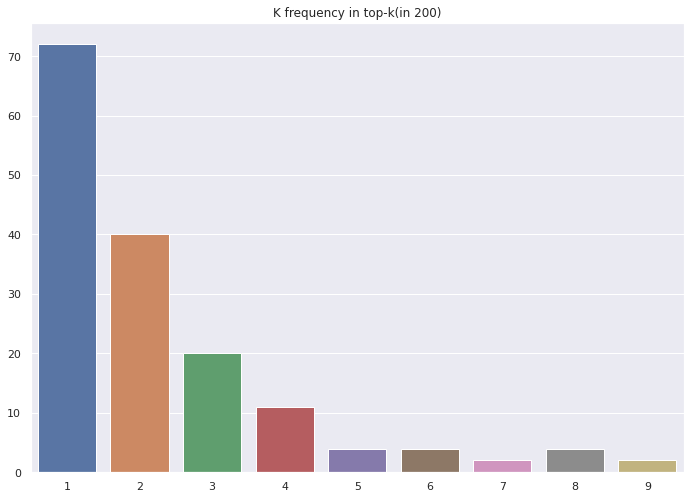

In [34]:
keys= list(top_n_counts.keys())
vals = [top_n_counts[k] for k in keys]
sns.barplot(x=keys, y=vals).set_title('K frequency in top-k(in 200)')

---
### train dataset에 대해 수행해보기
- **3592개중 3191개**가 top-10안에 찾아지네요.

In [35]:
train_datasets = load_from_disk(train_dir)
train_retrieved_datasets = retriever.retrieve(train_datasets['train'], topk=args.retriever.topk)
topk_dataset = train_retrieved_datasets['validation']
topk = pd.DataFrame(topk_dataset)
print(len(topk))


39520


In [36]:
total, correct = len(train_datasets['train']),0
top_n = defaultdict(int)
for i in range(len(train_datasets['train'])):
    for j in range(args.retriever.topk):
        if topk.original_context[i*10] == topk.context[i*10+j]:
            correct+=1
            top_n[j+1] += 1
            break
top_n_counts = dict(sorted(top_n.items()))
print(f"{correct}/{total}")

3191/3952


Text(0.5, 1.0, 'K frequency in top-k(in 3952)')

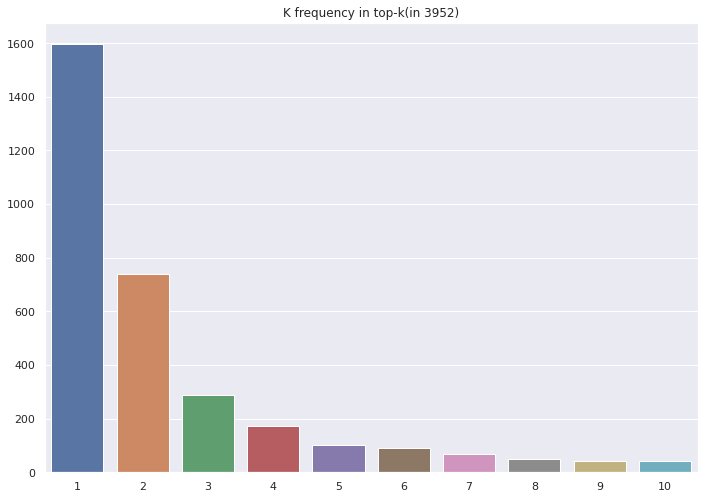

In [37]:
keys= list(top_n_counts.keys())
vals = [top_n_counts[k] for k in keys]
sns.barplot(x=keys, y=vals).set_title('K frequency in top-k(in 3952)')

---
## 토큰 길이 별 tf-idf 값
* token의 length에 따른 개수와 각 문서당 tfidf값의 총합을 계산해봤습니다.
* **대부분의 token이 3~7자 가량으로 이루어져있습니다.** 다만 bigram으로 이루어진 단어에는 띄어쓰기가 포함되어있기 때문에 최빈값인 4-6자는 **띄어쓰기를 포함하여 3-5자일 듯**합니다.

In [38]:
word_count['token_length'] = word_count['token'].str.len()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of token length')

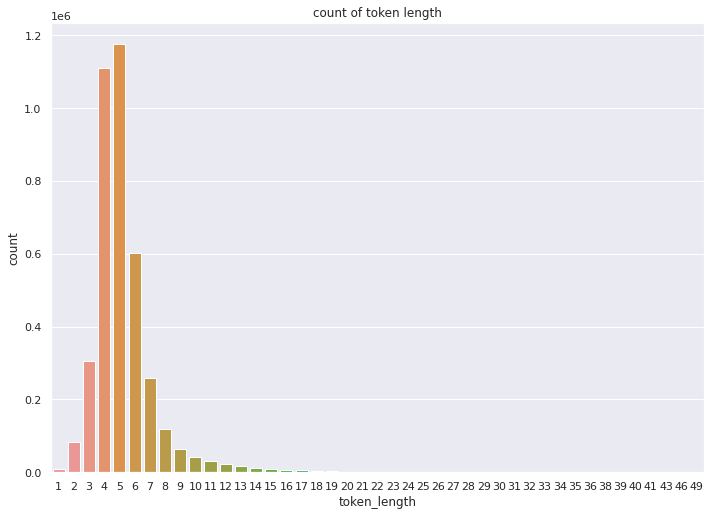

In [39]:
sns.countplot(word_count['token_length']).set_title('count of token length')

<AxesSubplot:xlabel='token_length', ylabel='sum_tfidf'>

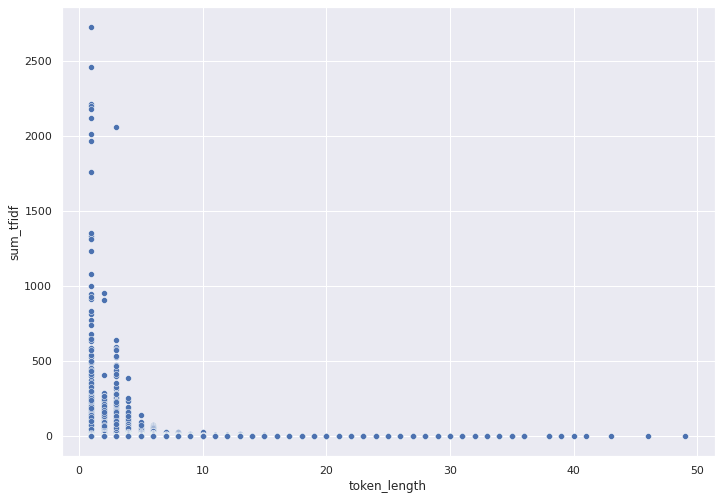

In [40]:
sns.scatterplot(x=word_count['token_length'], y=word_count['sum_tfidf'])

---
### tf-idf값 기준 높은 임베딩값?

In [42]:
word_count.sort_values('sum_tfidf', ascending=False).head(20)

,token,sum_tfidf,token_length
223421,.,2724.138785,1
2980798,의,2459.387917,1
1448056,는,2211.519426,1
1511725,다,2195.883846,1
3036159,이,2178.138166,1
137205,",",2121.530238,1
1511771,다 .,2060.032847,3
2590085,에,2012.952116,1
2955567,을,1966.449129,1
3699943,하,1756.310512,1


In [43]:
word_count.sort_values('sum_tfidf', ascending=True).head(20)

,token,sum_tfidf,token_length
883921,性 孝,0.00099,3
947840,群臣 或,0.00099,4
3834963,홈 나,0.00099,3
870864,尤 盡,0.00099,3
3584207,텨 댜,0.00099,3
3584206,텨 닑고,0.00099,4
3889436, 싣,0.00099,3
870865,尤 篤,0.00099,3
1364106,나 믄,0.00099,3
947819,群居 相呼,0.00099,5


In [117]:
print(retriever.p_embedding.max(axis=1).mean())
print(retriever.p_embedding.mean(axis=1).mean())
print(retriever.p_embedding.min(axis=1).max())

0.2721946527101926
4.322328122005074e-06
0.0


In [124]:
max_series = pd.Series(retriever.p_embedding.max(axis=1).toarray().squeeze())
mean_series = pd.Series(np.array(retriever.p_embedding.mean(axis=1)).squeeze())

In [127]:
emb_df = pd.concat({'max':max_series, 'mean':mean_series}, axis=1)

* embedding 값중, **한 doc에서 가장 높은 비중을 가지는 단어의 tf-idf값이 평균적으로 0.27정도입니다**.

In [129]:
emb_df.describe()

,max,mean
count,56737.000000,5.673700e+04
mean,0.272195,4.322328e-06
std,0.093963,1.070859e-06
min,0.020768,4.533370e-07
25%,0.202762,3.586536e-06
50%,0.255910,4.151213e-06
75%,0.324023,4.863148e-06
max,0.933758,1.385147e-05


Text(0.5, 1.0, 'tf-idf max in doc')

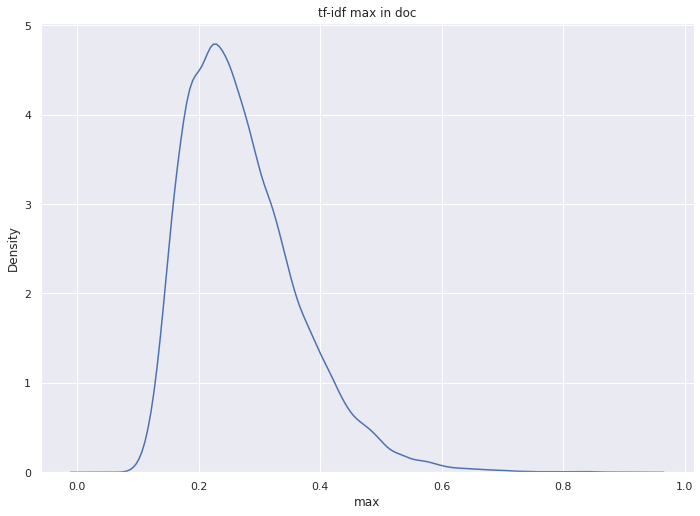

In [131]:
sns.kdeplot(emb_df['max']).set_title('tf-idf max in doc')

Text(0.5, 1.0, 'tf-idf mean in doc')

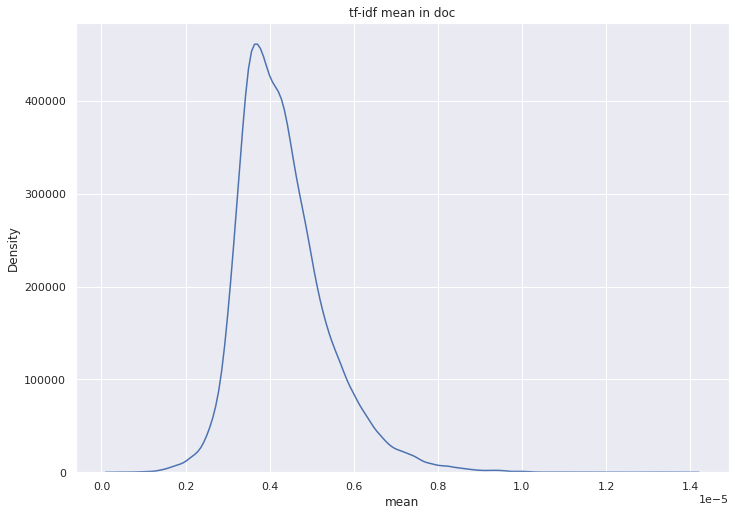

In [132]:
sns.kdeplot(emb_df['mean']).set_title('tf-idf mean in doc')